# Base Field Model for NOAA 1158
Construct a base field model for AR NOAA 1158 that we can build several different heating models on top of.

In [1]:
import os
import logging
logging.basicConfig(level=logging.DEBUG)

import numpy as np
from sunpy.map import Map
import yt
import h5py
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn.apionly as sns
import synthesizAR

%matplotlib inline

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
crop_range = (u.Quantity([-425,-165],u.arcsec),u.Quantity([-375,-100],u.arcsec))
zshape = 100
zrange = u.Quantity([0,max(np.diff(crop_range))],u.arcsec)

Take a look at this particular region in a few different wavelengths as well as the magnetogram.

In [3]:
hmi_map = Map('/data/datadrive1/ar_forward_modeling/systematic_ar_study/obs_data/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
aia_171_map = Map('/data/datadrive1/ar_forward_modeling/systematic_ar_study/obs_data/aia_lev1_171a_2011_02_12t15_32_12_34z_image_lev1.fits')
aia_193_map = Map('/data/datadrive1/ar_forward_modeling/systematic_ar_study/obs_data/aia_lev1_193a_2011_02_12t15_32_09_63z_image_lev1.fits')

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/sunpy/image/transform.py:130: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


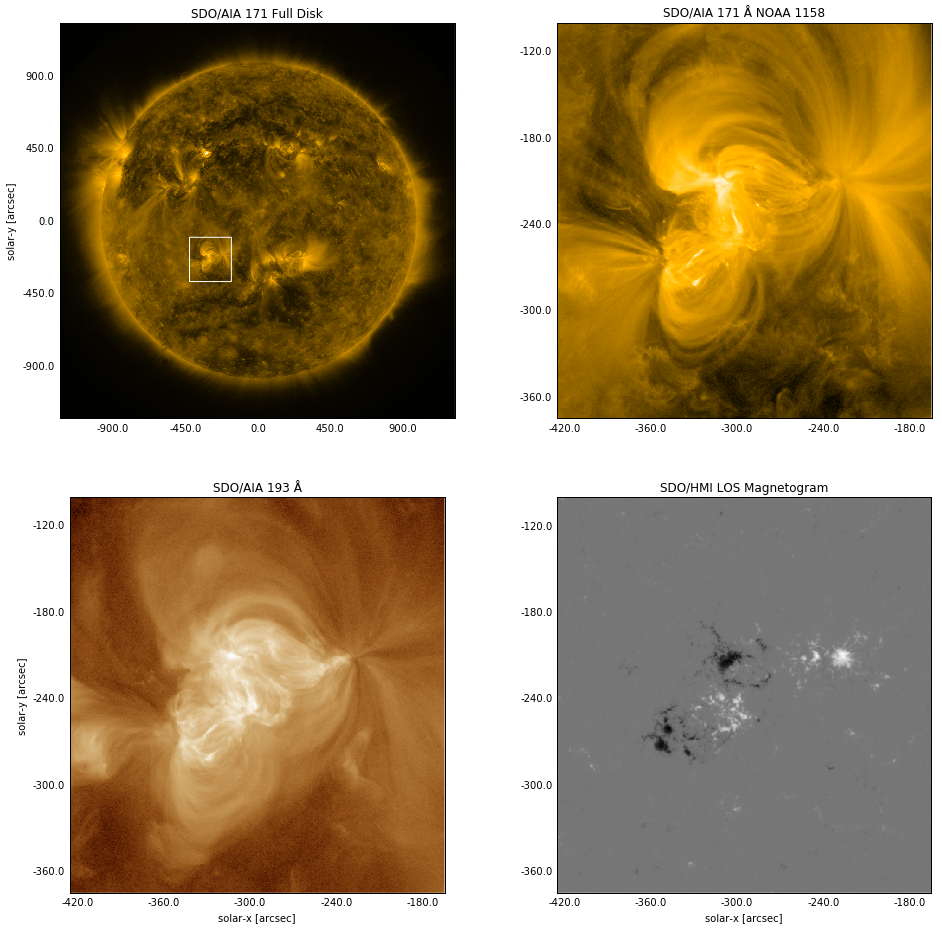

In [4]:
fig = plt.figure(figsize=(16,16))
## AIA
# 171
ax = fig.add_subplot(2,2,1,projection=aia_171_map)
aia_171_map.plot(annotate=False)
aia_171_map.draw_rectangle(u.Quantity([crop_range[0][0],crop_range[1][0]]),
                           np.diff(crop_range[0])[0],np.diff(crop_range[1])[0])
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/AIA 171 Full Disk')
ax.set_ylabel(r'solar-y [arcsec]')
aia_171_submap = aia_171_map.submap(*crop_range)
ax = fig.add_subplot(2,2,2,projection=aia_171_submap)
aia_171_submap.plot(annotate=False)
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/AIA 171 Å NOAA 1158')
#193
aia_193_submap = aia_193_map.submap(*crop_range)
ax = fig.add_subplot(2,2,3,projection=aia_193_submap)
aia_193_submap.plot(annotate=False)
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/AIA 193 Å')
ax.set_xlabel(r'solar-x [arcsec]')
ax.set_ylabel(r'solar-y [arcsec]')
## HMI
hmi_submap = hmi_map.rotate().submap(*crop_range)
ax = fig.add_subplot(2,2,4,projection=hmi_submap)
hmi_submap.plot(annotate=False)
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/HMI LOS Magnetogram')
ax.set_xlabel(r'solar-x [arcsec]')

Now perform the extrapolation.

In [5]:
field = synthesizAR.Skeleton(hmi_fits_file='/data/datadrive1/ar_forward_modeling/systematic_ar_study/obs_data/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits',
                             crop=crop_range,resample=u.Quantity([100,100],u.pixel))

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/sunpy/image/transform.py:130: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


In [6]:
field.extrapolate_field(zshape=zshape,zrange=zrange)

DEBUG:Skeleton:Extrapolating field.


True


DEBUG:Skeleton:Transforming to yt data object
yt : [INFO     ] 2017-09-12 14:24:48,471 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-09-12 14:24:48,472 Parameters: domain_dimensions         = [95 96 96]
yt : [INFO     ] 2017-09-12 14:24:48,474 Parameters: domain_left_edge          = [ -2.96081016e+10  -2.62091384e+10   3.91869796e+08]
yt : [INFO     ] 2017-09-12 14:24:48,476 Parameters: domain_right_edge         = [ -1.18463315e+10  -7.41270210e+09   1.92016200e+10]
yt : [INFO     ] 2017-09-12 14:24:48,479 Parameters: cosmological_simulation   = 0.0


Extract $1\times10^4$ fieldlines.

In [7]:
field.extract_streamlines(10000,loop_length_range=[1e9,2e10]*u.cm,close_threshold=0.05)

INFO:Skeleton:Tracing fieldlines
DEBUG:Skeleton:Remaining number of streamlines is 10000
yt : [INFO     ] 2017-09-12 14:25:38,387 AMRKDTree rebuilt, Final Volume: 6.279785e+30
Streamlining: 100%|██████████| 10000/10000 [00:27<00:00, 360.67it/s]
DEBUG:Skeleton:Remaining number of streamlines is 3808
yt : [INFO     ] 2017-09-12 14:26:16,823 AMRKDTree rebuilt, Final Volume: 6.279785e+30
Streamlining: 100%|██████████| 3808/3808 [00:10<00:00, 368.92it/s]
DEBUG:Skeleton:Remaining number of streamlines is 1382
yt : [INFO     ] 2017-09-12 14:26:31,159 AMRKDTree rebuilt, Final Volume: 6.279785e+30
Streamlining: 100%|██████████| 1382/1382 [00:03<00:00, 350.22it/s]
DEBUG:Skeleton:Remaining number of streamlines is 530
yt : [INFO     ] 2017-09-12 14:26:36,675 AMRKDTree rebuilt, Final Volume: 6.279785e+30
Streamlining: 100%|██████████| 530/530 [00:01<00:00, 343.03it/s]
DEBUG:Skeleton:Remaining number of streamlines is 183
yt : [INFO     ] 2017-09-12 14:26:38,988 AMRKDTree rebuilt, Final Volume: 6.2

In [8]:
field.make_loops()

We can examine the distribution of loop lengths over the whole AR.

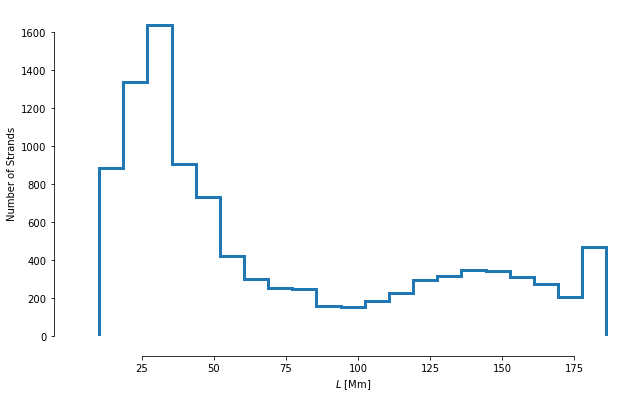

In [11]:
plt.figure(figsize=(10,6))
plt.hist([loop.full_length.to(u.Mm).value for loop in field.loops],histtype='step',lw=3,bins='fd');
plt.xlabel(r'$L$ [Mm]')
plt.ylabel(r'Number of Strands')
sns.despine(trim=True,offset=20)

Now, we can visualize the magnetogram as well as the AIA observations with the extrapolated loops overlaid.

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/sunpy/image/transform.py:130: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


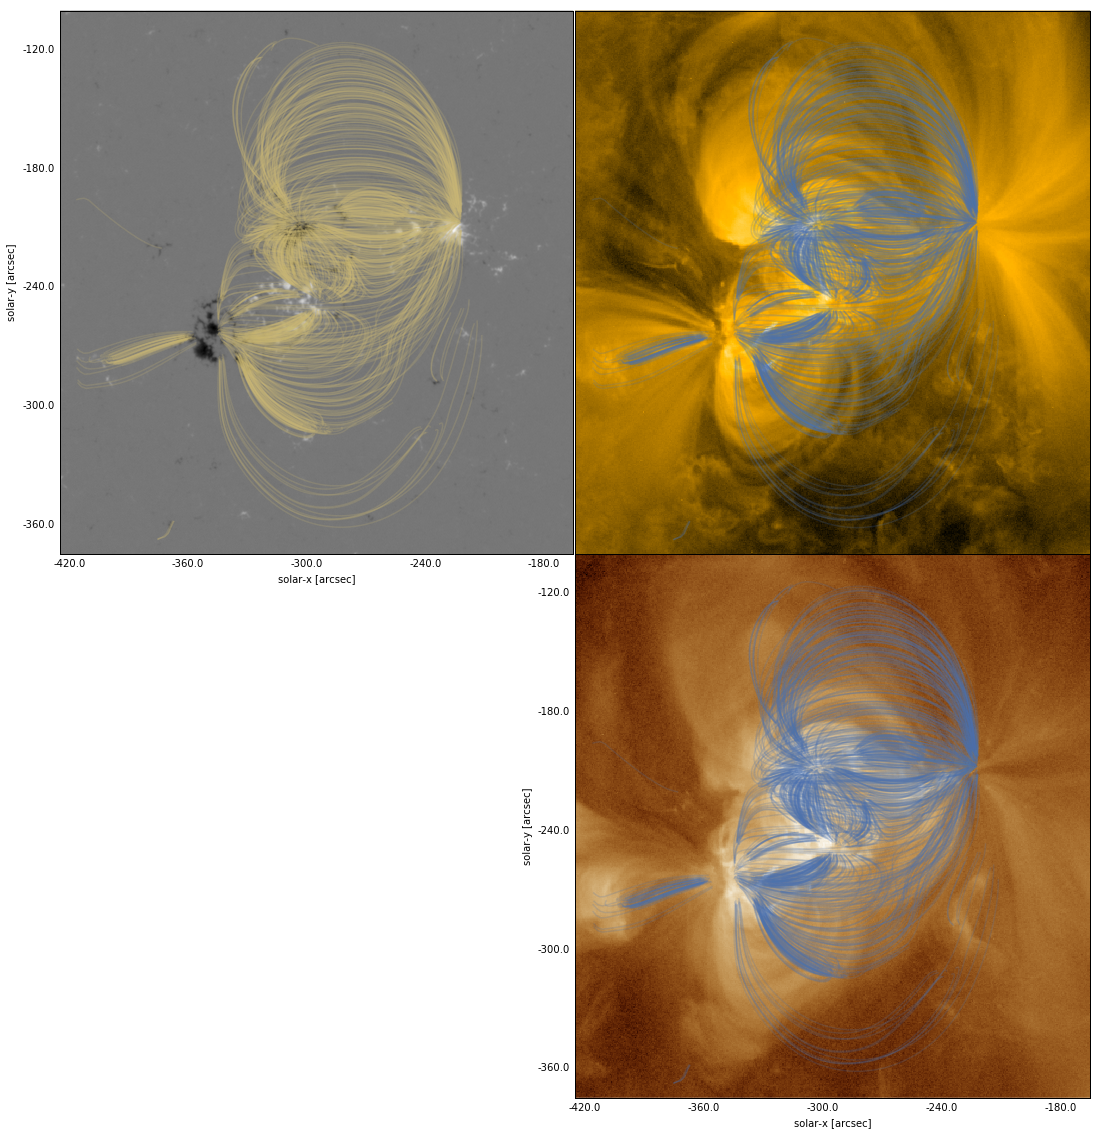

In [12]:
fig = plt.figure(figsize=(18.5,20))
plt.subplots_adjust(hspace=0.,wspace=0.)
## HMI
hmi_submap = hmi_map.rotate().submap(*crop_range)
axhmi = fig.add_subplot(2,2,1,projection=hmi_submap)
hmi_submap.plot(annotate=False)
axhmi.coords[0].grid(alpha=0)
axhmi.coords[1].grid(alpha=0)
axhmi.coords[0].set_ticks_visible(False)
axhmi.coords[1].set_ticks_visible(False)
#axhmi.coords[0].set_ticklabel_visible(False)
axhmi.set_xlabel(r'solar-x [arcsec]')
axhmi.set_ylabel(r'solar-y [arcsec]')
#axhmi.set_title(r'SDO/HMI')
## AIA
# 171
aia_171_submap = aia_171_map.submap(*crop_range)
ax171 = fig.add_subplot(2,2,2,projection=aia_171_submap)
aia_171_submap.plot(annotate=False)
ax171.coords[0].grid(alpha=0)
ax171.coords[1].grid(alpha=0)
#ax171.set_title('NOAA 1158\nSDO/AIA 171 Å')
ax171.coords[1].set_ticklabel_visible(False)
ax171.coords[0].set_ticklabel_visible(False)
ax171.coords[0].set_ticks_visible(False)
ax171.coords[1].set_ticks_visible(False)

#ax171.set_xlabel(r'solar-x [arcsec]')
#193
aia_193_submap = aia_193_map.submap(*crop_range)
ax193 = fig.add_subplot(2,2,4,projection=aia_193_submap)
aia_193_submap.plot(annotate=False)
ax193.coords[0].grid(alpha=0)
ax193.coords[1].grid(alpha=0)
ax193.coords[0].set_ticks_visible(False)
ax193.coords[1].set_ticks_visible(False)
#ax193.set_title(r'SDO/AIA 193 Å')
ax193.set_xlabel(r'solar-x [arcsec]')
ax193.set_ylabel(r'solar-y [arcsec]')
alpha=0.2
for stream, _ in field.streamlines[::10]:
    axhmi.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
               field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
               alpha=alpha,color=sns.color_palette('deep')[4],
               transform=axhmi.get_transform('world'))
    ax171.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
               field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
               alpha=alpha,color=sns.color_palette('deep')[0],
               transform=ax171.get_transform('world'))
    ax193.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
               field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
               alpha=alpha,color=sns.color_palette('deep')[0],
               transform=ax193.get_transform('world'))

Finally, save the field to be reloaded later when we are investigating various heating models.

In [13]:
field.save('/data/datadrive2/systematic_ar_study/base_noaa1158')